Importing Libraries

In [ ]:
import matplotlib   # data visualization library in Python
from keras.models import load_model  # keras DL framework for training neural network
from keras.preprocessing import image  # image data preprocessing and augmentation
import numpy as np  # numerical and mathemtaical operations in python
import cv2

Mounting Google Drive for extracting Dataset

In [ ]:
from google.colab import drive # to get to our dataset uploaded at drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from PIL import Image as pil_image # used to deal with images
import matplotlib.pyplot as plt # used for visualisation
%matplotlib inline
# enables the drawing from matplotlib

In [ ]:
from keras import backend as K # provides building block for developing dlmodels
import tensorflow as tf # dl applications

In [ ]:
from keras.preprocessing.image import ImageDataGenerator # used to receive new variation of image at each epoch

Generating/Normalizing Image

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

# in this we try to make all our images similar so that the model can be trained on it

In [ ]:
image_shape=(150, 150, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
# dropout - to reduce the overfitting of the neural networks
# activation - applies activation function to the output
# dense - layer in which each neuron is deeply connected to each other
# MaxPooling2D is a pooling or max pooling operation which calculates the largest or maximum value in every patch and the feature map.

Using Sequential model

In [ ]:
# we use sequential model when there is a single input and a single output
model = Sequential()

Trying Out with different Filters

In [ ]:
# max pooling - calculates the largest or maximum value in every patch and the feature map
# relu - the output of one is the input of the other, if the output is positive otherwise output will be zero

In [ ]:
# kernel_size - Limiting the number of parameters, we are limiting the number of unrelated features possible.
# filters - 32 and 64 are the number of features we are extracting

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
# to get the final shape of our 3d image
model.output_shape

(None, 7, 7, 32)

Flattening out the Image

In [ ]:
# converting the image into 1d image and getting its shape
model.add(Flatten())

In [ ]:
model.output_shape # the final output size of the 1D array (7*7*32)

(None, 1568)

Trying out different Activations with Varying Densities

In [ ]:
model.add(Dense(128))
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
model.save_weights('model1.h5')

# The binary_crossentropy will calculate the crossentropy loss between the predicted classes and the true classes.
# Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.Gradient Descent algorithm The king of all the optimizers and it's very fast, robust, and flexible.

Summary of our model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
batch_size=5

Importing train test images in Binary class mode

In [ ]:
train_image_gen=image_gen.flow_from_directory('/content/gdrive/My Drive/teeth_dataset/train',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 60 images belonging to 2 classes.


In [ ]:
test_image_gen=image_gen.flow_from_directory('/content/gdrive/My Drive/teeth_dataset/test',
                                             target_size=image_shape[:2],
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 14 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices


{'caries': 0, 'without_caries': 1}

In [ ]:
test_image_gen.class_indices

{'caries': 0, 'no-caries': 1}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Training the model with 75 epochs and 10 steps per epoch

In [ ]:
results = model.fit_generator(train_image_gen,
                              epochs=75,
                             steps_per_epoch=10,
                             validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/75
10/10 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.7400

10/10 [==============================] - 30s 3s/step - loss: 0.6700 - accuracy: 0.7400 - val_loss: 0.6387 - val_accuracy: 0.7143
Epoch 2/75
10/10 [==============================] - 3s 292ms/step - loss: 0.6046 - accuracy: 0.7800
Epoch 3/75
10/10 [==============================] - 3s 326ms/step - loss: 0.6730 - accuracy: 0.7200
Epoch 4/75
10/10 [==============================] - 2s 206ms/step - loss: 0.5892 - accuracy: 0.7400
Epoch 5/75
10/10 [==============================] - 2s 204ms/step - loss: 0.5990 - accuracy: 0.7600
Epoch 6/75
10/10 [==============================] - 2s 208ms/step - loss: 0.5572 - accuracy: 0.7600
Epoch 7/75
10/10 [==============================] - 2s 204ms/step - loss: 0.5990 - accuracy: 0.7400
Epoch 8/75
10/10 [==============================] - 3s 297ms/step - loss: 0.5792 - accuracy: 0.7200
Epoch 9/75
10/10 [==============================] - 3s 334ms/step - loss: 0.5636 - accuracy: 0.7800
Epoch 10/75
10/10 [==============================] - 2s 202ms/step - lo

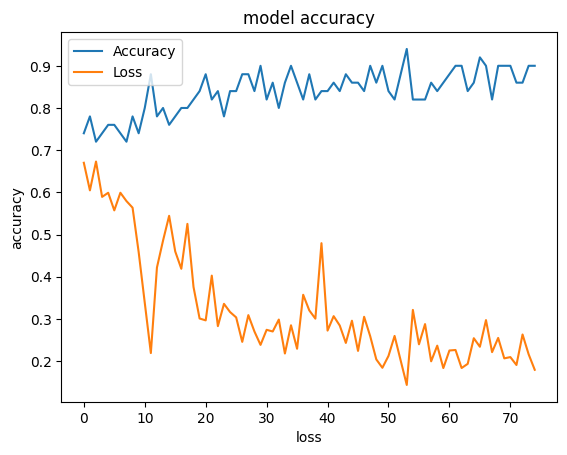

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('loss')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [ ]:
%matplotlib inline

Predicting if its healthy or not, by then if the predict>0.5, its healthy else its not

In [ ]:
from keras.preprocessing import image
import numpy as np
def get_res(path):
    raw_img = tf.keras.utils.load_img(path, target_size=(150, 150))
    raw_img = tf.keras.utils.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255
    predict = model.predict(raw_img)
    plt.imshow(cv2.imread(path))
    if predict >= 0.5:
        text = "Healthy tooth"
    elif 0.25 <= predict <= 0.45:
        text = "Mild cavity on teeth"
    else:
        text = "Cavity infected tooth"
    plt.show()
    print(text)

Giving the path and testing on random image

1/1 [==============================] - 0s 148ms/step


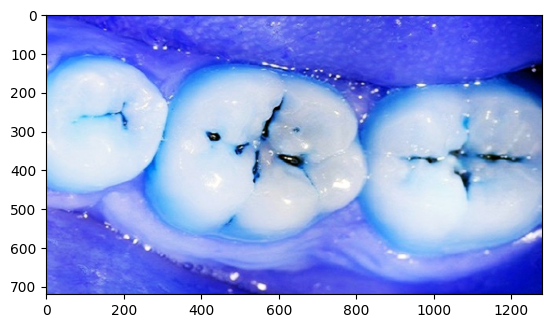

Cavity infected tooth


In [ ]:
# path='/content/gdrive/My Drive/teeth_dataset/test/no-caries/nc10.jpg'
path='/content/cav11.jpg'

get_res(path)